<a href="https://colab.research.google.com/github/robitussin/CCDEPLRL_EXERCISES/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

In [457]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [458]:
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [459]:
dataset.head()

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


In [460]:
sentences = dataset['review'].tolist()
labels = dataset['rating'].tolist()

training_size = int(len(sentences) * 0.8)
binary_rating = [1 if r >= 4 else 0 for r in labels]
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = binary_rating[0:training_size]
testing_labels = binary_rating[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [461]:
vocab_size = 2000
embedding_dim = 20
max_length = 15
trunc_type='post'
padding_type='post'
oov_tok = ""

## 1. Tokenize the data

In [462]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

In [463]:
word_index = tokenizer.word_index
print(word_index)

{'': 1, 'the': 2, 'na': 3, 'i': 4, 'ko': 5, 'sa': 6, 'yung': 7, 'and': 8, 'ang': 9, 'ng': 10, 'it': 11, 'lang': 12, 'is': 13, 'at': 14, 'you': 15, 'seller': 16, 'naman': 17, 'to': 18, 'for': 19, 'not': 20, 'po': 21, 'sya': 22, 'maganda': 23, 'order': 24, 'pa': 25, 'but': 26, 'thank': 27, 'pero': 28, 'a': 29, 'good': 30, 'item': 31, 'product': 32, 'hindi': 33, 'so': 34, 'sana': 35, 'my': 36, 'ung': 37, 'dumating': 38, 'this': 39, 'ok': 40, 'delivery': 41, 'di': 42, 'was': 43, 'din': 44, 'its': 45, 'may': 46, 'quality': 47, 'in': 48, 'color': 49, 'price': 50, 'working': 51, 'very': 52, 'of': 53, 'ako': 54, 'ganda': 55, 'that': 56, 'me': 57, 'lng': 58, 'well': 59, 'buy': 60, 'with': 61, 'size': 62, 'mga': 63, 'fast': 64, 'as': 65, 'nice': 66, 'nyo': 67, 'will': 68, 'time': 69, 'nya': 70, 'siya': 71, '1': 72, 'black': 73, 'just': 74, 'items': 75, 'lazada': 76, 'thanks': 77, 'kasi': 78, 'are': 79, 'okay': 80, 'much': 81, 'kaso': 82, 'nmn': 83, 'on': 84, 'kaya': 85, '2': 86, 'kung': 87, 'ord

## 2. Sequence the data

In [464]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

print(training_sequences)
print(testing_sequences)

[[749, 80, 1514, 390, 66], [42, 1515, 517, 63, 62, 219, 46, 89, 603, 1516], [94, 126, 11, 9, 55, 1517, 1518, 24, 3, 100, 42, 100, 1519, 1520, 55, 24, 167, 54, 14, 9, 168, 38], [55, 21, 104], [119, 1521, 23, 604, 22], [9, 1522, 345, 518, 1523, 345, 1524, 5, 104, 44, 6, 41, 605, 9, 1007, 180, 27, 15, 21, 220], [23, 22, 153, 127, 120, 12], [], [], [127, 445, 14, 750, 1008, 1525, 10, 1526, 42, 23, 9, 519, 42, 751, 1009, 91, 391, 91, 317, 1527, 520, 10, 1528], [606, 1529], [1530, 607, 47, 1531, 1532], [27, 15, 9, 55, 1533, 167, 54, 10, 1534, 35, 36, 272, 3, 114, 101, 521, 1010], [30, 47, 14, 119, 17, 9, 1535, 27, 15, 16], [55, 1536, 12, 392, 167, 446, 5, 1537, 33, 107, 28, 9, 55, 522, 752], [1538, 1539, 1540], [9, 55, 1541, 1542, 25, 6, 1011, 114, 25, 1543, 9, 1011, 77, 16, 14, 6, 1544, 169, 115, 24, 167, 523], [40, 17, 7, 1545, 608, 753, 3, 447, 253, 108, 12, 8, 127, 107, 22, 42, 393, 136, 6, 181, 195, 154, 524, 28, 40, 3, 22, 19, 2, 50, 108, 12, 17, 182, 609, 5, 12, 22, 10, 1546, 1547, 3]

## 3. Pad the data

In [465]:
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(training_padded)
print(testing_padded)

[[ 749   80 1514 ...    0    0    0]
 [  42 1515  517 ...    0    0    0]
 [  94  126   11 ... 1519 1520   55]
 ...
 [   4   24  101 ...    1   26    2]
 [   9  273   38 ...    0    0    0]
 [ 175   54    6 ...   35 1438    5]]
[[ 159    8  210 ...  646 1125  181]
 [ 149   49  124 ...    0    0    0]
 [   1    7  151 ...    0    0    0]
 ...
 [ 276   33    1 ...    1  155   12]
 [ 525  175   58 ...    5   28  191]
 [ 104   21    6 ...   14 1347  150]]


## 4. Train a sentiment model

In [466]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.build(input_shape=(None, max_length)) # force build
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_35 (Embedding)        │ (None, 15, 20)         │        40,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_35     │ (None, 20)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 6)              │           126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,133 (156.77 KB)

 Trainable params: 40,133 (156.77 KB)

 Non-trainable params: 0 (0.00 B)

## Get files for visualing the network

In [467]:
num_epochs = 60
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5184 - loss: 0.6930 - val_accuracy: 0.2388 - val_loss: 0.6991
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6337 - loss: 0.6876 - val_accuracy: 0.3930 - val_loss: 0.6996
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7431 - loss: 0.6752 - val_accuracy: 0.5672 - val_loss: 0.6879
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8084 - loss: 0.6541 - val_accuracy: 0.6816 - val_loss: 0.6693
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8282 - loss: 0.6312 - val_accuracy: 0.6617 - val_loss: 0.6562
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8582 - loss: 0.5884 - val_accuracy: 0.7214 - val_loss: 0.6259
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8453 - loss: 0.5561 - val_accuracy: 0.7463 - val_loss: 0.6007
Epoch 8/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8638 - loss: 0.5103 - val_accuracy: 0.7413 - val_loss

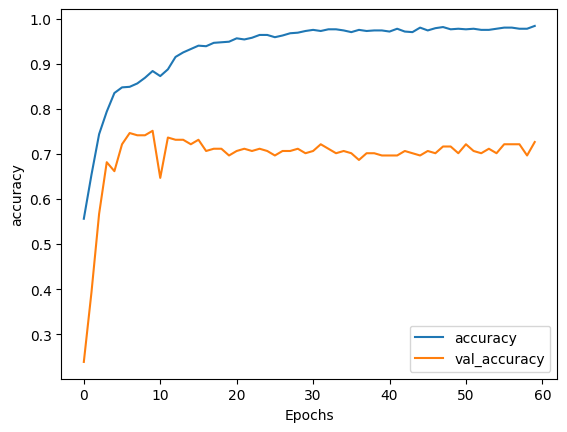

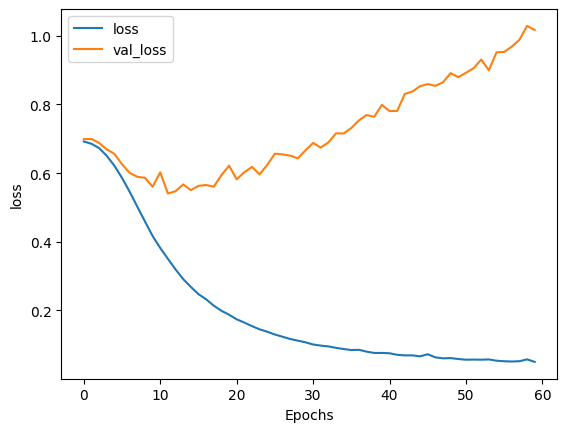

In [468]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [469]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(2000, 20)


In [473]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [474]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 5. Predict sentiment with new reviews

In [477]:
# Use the model to predict a review
fake_reviews = ['Gusto ko ang telephone nato',
                'Ayoko ng lasa',
                'Malamig ang lahat',
                'Mainit ang lahat, eksakto sa gusto ko',
                'Lahat ay kulay berde',
                'Agad kaming pinaupo ng host',
                'Binigyan nila kami ng libreng tsokolate cake',
                'Hindi ako sigurado sa nalantang mga bulaklak sa mesa',
                'Gumagana lang kapag nakatiptoe ako',
                'Hindi gumagana kapag nakatihaya ako']


print(fake_reviews)

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:
# they gave us free chocolate cake and did not charge us

['Gusto ko ang telephone nato', 'Ayoko ng lasa', 'Malamig ang lahat', 'Mainit ang lahat, eksakto sa gusto ko', 'Lahat ay kulay berde', 'Agad kaming pinaupo ng host', 'Binigyan nila kami ng libreng tsokolate cake', 'Hindi ako sigurado sa nalantang mga bulaklak sa mesa', 'Gumagana lang kapag nakatiptoe ako', 'Hindi gumagana kapag nakatihaya ako']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Gusto ko ang telephone nato
[0.88963175]


Ayoko ng lasa
[0.6946214]


Malamig ang lahat
[0.93520206]


Mainit ang lahat, eksakto sa gusto ko
[0.9471293]


Lahat ay kulay berde
[0.57068473]


Agad kaming pinaupo ng host
[0.8267968]


Binigyan nila kami ng libreng tsokolate cake
[0.66361517]


Hindi ako sigurado sa nalantang mga bulaklak sa mesa
[0.5604582]


Gumagana lang kapag nakatiptoe ako
[0.5950529]


Hindi gumagana kapag nakatihaya ako
[0.13135329]


